In [142]:
import numpy as np
import matplotlib.pyplot as plt


1. На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц. Определите
спектр сигнала с помощью стандартной функции быстрого преобразования Фурье.

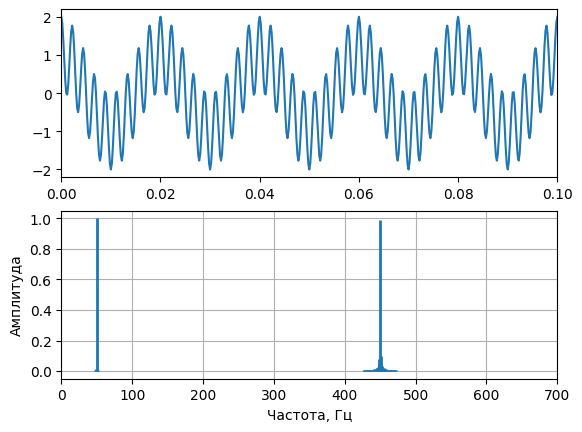

In [143]:
def cos_signal(t, f, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, f - список частот сигнала, A - амплитуда сигнала.
    '''
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

num_cos = 5000  # количество отсчетов
f = [50, 450]

# создание сигнала
t_cos = np.linspace(0, 1, num_cos)
y_cos = cos_signal(t_cos, f)

# дискретный спектр
freq_cos = np.fft.rfftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
yff = np.fft.rfft(y_cos)

fig, axs = plt.subplots(2)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

# график спектра
axs[1].vlines(freq_cos, 0, abs(yff) / num_cos * 2, linewidth=2)
axs[1].grid()
axs[1].set_xlabel('Частота, Гц')
axs[1].set_ylabel('Амплитуда')
axs[1].set_xlim(0, 700)

plt.show()


2. Построить фильтр Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу, убедиться, что
происходит подавление высоких частот сигнала 150 и 450 Гц. При моделировании ФНЧ
воспользоваться формулой (32). Частоту среза фильтра Баттерворта подберите самостоятельно. В
данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц.
Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра
Баттерворта. Убедитесь, что амплитуда исходного сигнала только для частоты 50 Гц будет
совпадать с амплитудой отфильтрованного сигнала.

(32) $H(w, w_c) = \dfrac{w_c^2}{−w^2 + j√2w_cw + w_c^2}$

In [144]:
w = np.linspace(0, 700, 10000)

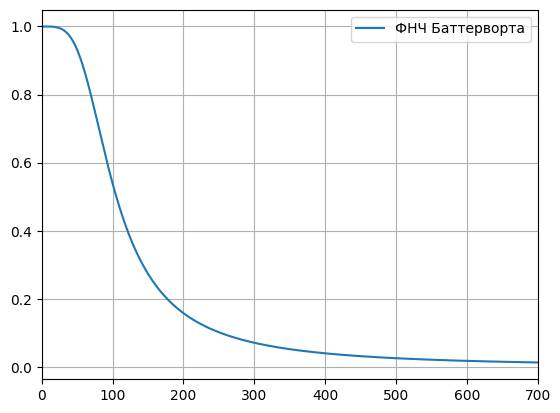

In [145]:
def butter_lpf(w, wc):
    return wc**2 / (-w**2 + 1j * np.sqrt(2) * wc * w + wc**2)

wc = 80 # частота среза

plt.plot(w, abs(butter_lpf(w, wc=wc)), label = "ФНЧ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

In [146]:
y_cos_50 = cos_signal(t_cos, [50])

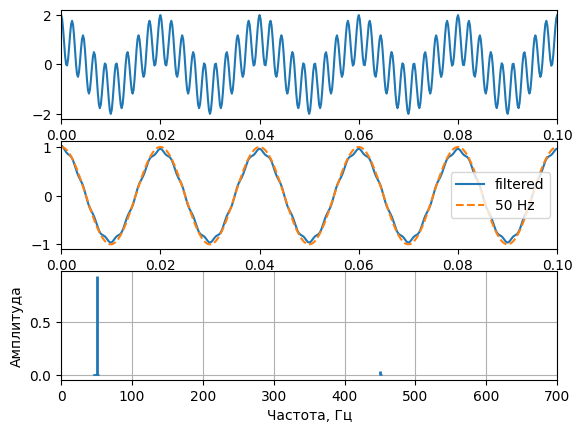

In [147]:
y_fft_b = yff * abs(butter_lpf(freq_cos, wc)) # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b).real
axs[1].plot(t_cos, yB)
axs[1].plot(t_cos, y_cos_50, linestyle='dashed')
axs[1].legend(["filtered", "50 Hz"]) 
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

3. Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит подавление
низких частот сигнала (50 и 150 Гц), воспользовавшись формулой (35).
Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра
ФНЧ.

(35) $H(w, w_c) = \dfrac{w^2}{−w_c^2 + j√2w_cw + w^2}$

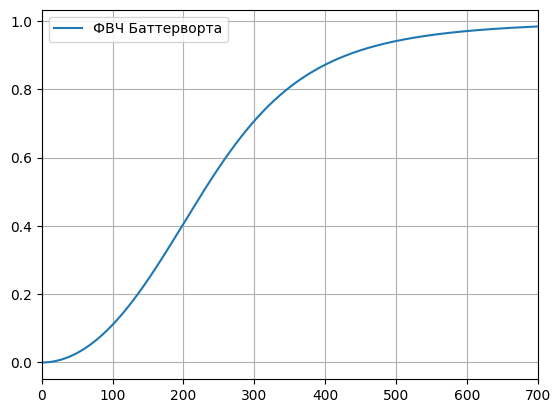

In [148]:
def butter_hpf(w, wc):
    return w**2 / (-wc**2 + 1j * np.sqrt(2) * wc * w + w**2)

wc = 300 # частота среза

plt.plot(w, abs(butter_hpf(w, wc=wc)), label = "ФВЧ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

In [149]:
y_cos_450 = cos_signal(t_cos, [450])

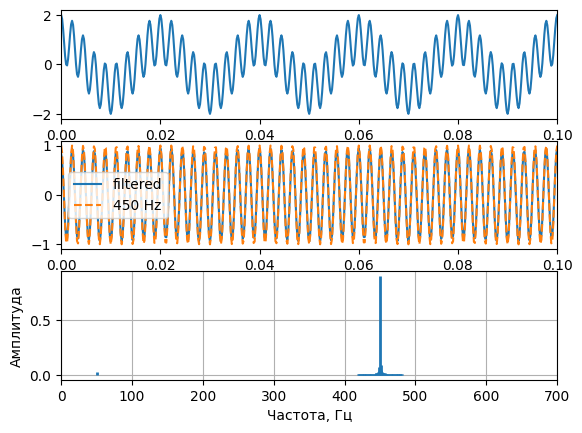

In [150]:
y_fft_b = yff * abs(butter_hpf(freq_cos, wc))

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b)
axs[1].plot(t_cos, yB.real)
axs[1].plot(t_cos, y_cos_450, linestyle='dashed')
axs[1].legend(["filtered", "450 Hz"]) 
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

4. Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту
150Гц. При моделировании использовать формулы (36) и (37).
Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров
ПФ/ЗФ.

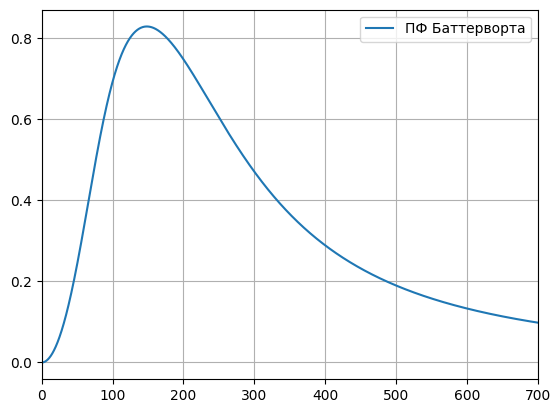

In [151]:
def butter_bpf(w, w1, w2):
    return butter_lpf(w, w2) * butter_hpf(w, w1)

w1 = 100
w2 = 220

plt.plot(w, abs(butter_bpf(w, w1, w2)), label = "ПФ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

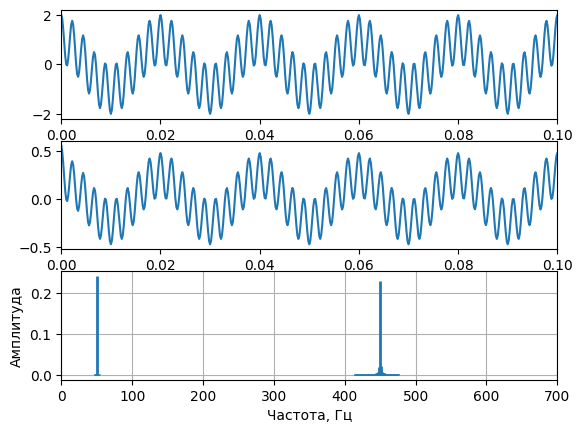

In [152]:
y_fft_b = yff * abs(butter_bpf(freq_cos, w1, w2))

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b)
axs[1].plot(t_cos, yB.real)
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

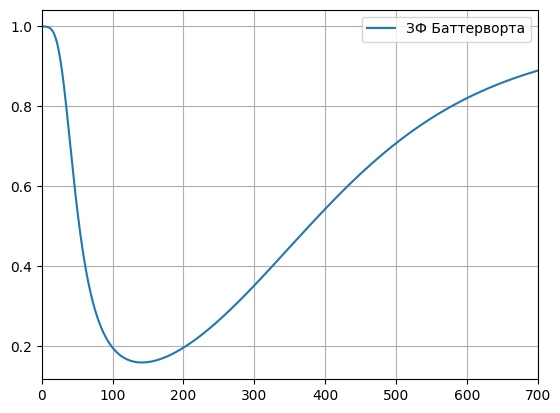

In [153]:
def butter_bsf(w, w1, w2):
    return butter_lpf(w, w1) + butter_hpf(w, w2)

w1 = 40
w2 = 500

plt.plot(w, abs(butter_bsf(w, w1, w2)), label = "ЗФ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

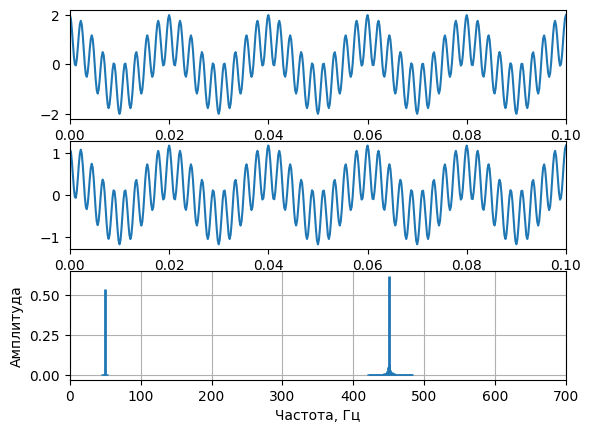

In [154]:
y_fft_b = yff * abs(butter_bsf(freq_cos, w1, w2))

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b)
axs[1].plot(t_cos, yB.real)
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

5. Согласно формулам (28, 29) возможно построить фильтр Баттерворта любого порядка.
Постройте фильтр Баттерворта 3-го и 4-го порядка с автоматическим определением полюсов
фильтра. Реализуйте пункт 1 данной лабораторной для Фильтра Баттерворта 4-го порядка.

(28) $H_p(S, n) = \dfrac{1}{1 + (−1)^n(S)^{2n}}$

(29) $H_n(S) = \dfrac 1 {(S − S_1) \cdot (S − S_2) \dots (S − S_n)}$

$S_1 , S_2 , ..., S_n$ – полюсы

S1 = exp (j ∙ 3π/4)

S2 = exp (j ∙ 5π/4)

примеч.: Полюсы передаточной функции обладают симметрией, а именно их число и
конфигурация расположения в обеих полуплоскостях одинаковы. При этом физически
реализуемому фильтру отвечают только полюсы, расположенные в левой полуплоскости.

Полюсы фильтра Баттерворта 2-го порядка: [(-0.7071067811865475+0.7071067811865476j), (-0.7071067811865477-0.7071067811865475j)]
Полюсы фильтра Баттерворта 3-го порядка: [(-0.4999999999999998+0.8660254037844387j), (-1+1.2246467991473532e-16j), (-0.5000000000000004-0.8660254037844385j)]
Полюсы фильтра Баттерворта 4-го порядка: [(-0.3826834323650897+0.9238795325112867j), (-0.9238795325112867+0.3826834323650899j), (-0.9238795325112868-0.38268343236508967j), (-0.38268343236509034-0.9238795325112865j)]


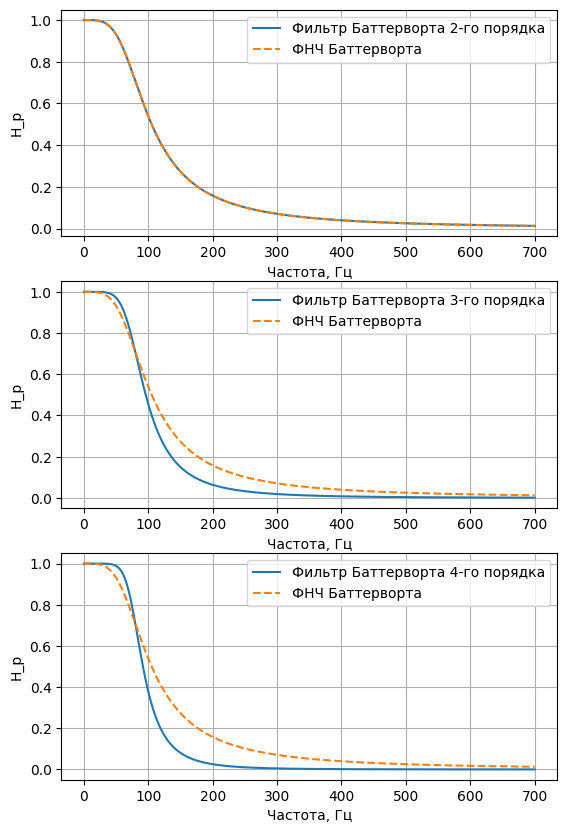

In [176]:
def H_p(w, wc, n): # Фильтр высоких частот порядка n
    s = 1j * w / wc
    poles = []
    for k in range(n):
        pole = np.exp(1j * np.pi * (n + 2 * k + 1) / (2 * n))
        poles.append(pole)

    polynomial = 1
    for pole in poles:
        polynomial *= (s - pole)
    print(f"Полюсы фильтра Баттерворта {n}-го порядка:", poles)
    return 1 / polynomial

wc = 80 # частота среза

ns = [2, 3, 4]
fig, axes = plt.subplots(len(ns))
fig.set_figheight(10)

for i, n in enumerate(ns):
    axes[i].plot(w, abs(H_p(w, wc, n)), label = f"Фильтр Баттерворта {n}-го порядка")
    axes[i].plot(w, abs(butter_lpf(w, wc)), label = "ФНЧ Баттерворта", linestyle='dashed')
    axes[i].set_xlabel("Частота, Гц")
    axes[i].set_ylabel("H_p")
    axes[i].legend()
    axes[i].grid()

plt.show()


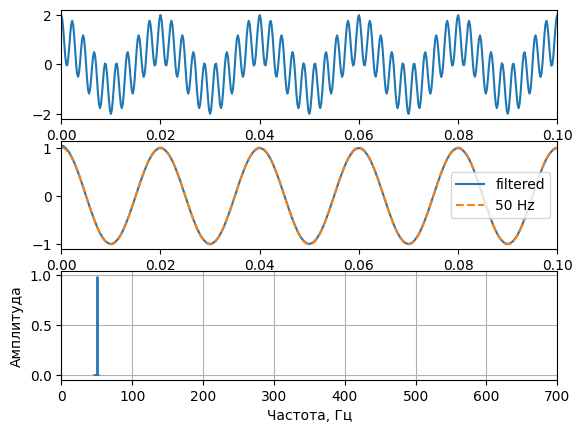

In [ ]:
y_fft_b = yff * abs(H_p(freq_cos, wc, n)) # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b).real
axs[1].plot(t_cos, yB)
axs[1].plot(t_cos, y_cos_50, linestyle='dashed')
axs[1].legend(["filtered", "50 Hz"]) 
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

6. Попробуйте добавить шум к исходному сигналу, посмотрите как происходит фильтрация
для зашумленного сигнала.

In [ ]:
# зашумленный сигнал
def add_noise(signal, noise_level=1):
    '''
    Добавление к сигналу гауссовского шума 
    '''
    return signal + np.random.normal(0, noise_level, signal.shape)

y_cos_noised = add_noise(y_cos, 2)

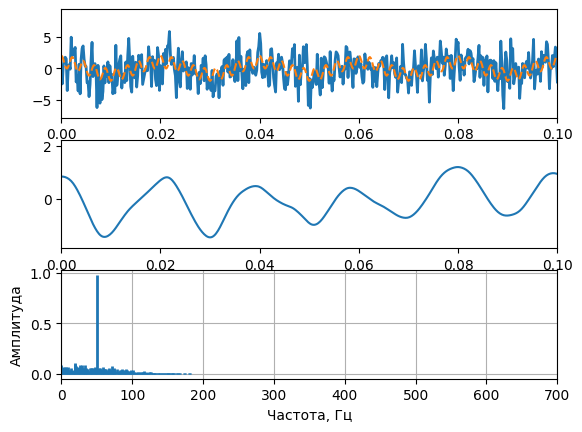

In [ ]:
yff_noised = np.fft.rfft(y_cos_noised)
y_fft_b = yff_noised * abs(H_p(freq_cos, wc, n)) # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(t_cos, y_cos_noised, linewidth=2)
axs[0].plot(t_cos, y_cos, linestyle='dashed')
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_b).real
axs[1].plot(t_cos, yB)
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq_cos, 0, np.abs(y_fft_b) / num_cos * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()